In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# define exact function,for test
def exact_function(x,y):
    u_xy = np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2
    return u_xy

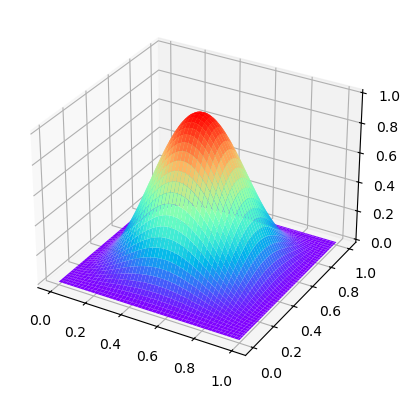

In [3]:
# test real function
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
xx,yy = np.meshgrid(x,y)
u_xy = exact_function(xx,yy)
ax3 = plt.axes(projection='3d')
ax3.plot_surface(xx,yy,u_xy,cmap='rainbow') 

In [4]:
# calculate f(x,y),the source term
def soure_term(x,y):
    f_xy = 2*np.pi**2 * (np.cos(2*np.pi*x) * np.sin(np.pi*y)**2 + np.cos(2*np.pi*y) * np.sin(np.pi*x)**2)
    return f_xy

In [5]:
def get_source_term(N1,N2):
    x = np.linspace(0,1,N1,endpoint = False)
    y = np.linspace(0,1,N2,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y)
    xx,yy = np.meshgrid(x,y,indexing='ij')
    sourse_term = soure_term(xx,yy)
    sourse_term = sourse_term.flatten(order='F')
    return sourse_term

In [6]:
def B_operator(v):
    m, n = v.shape
    result = np.zeros_like(v)

    for j in range(1, n - 1): 
        result[:, j] = (v[:, j - 1] + 10 * v[:, j] + v[:, j + 1]) / 12

    result[:, 0] = v[:, 0]
    result[:, -1] = v[:, -1]

    return result

In [7]:
def A_operator(v):
    m, n = v.shape
    result = np.zeros_like(v)

    for i in range(1, m - 1):  
        result[i, :] = (v[i - 1, :] + 10 * v[i, :] + v[i + 1, :]) / 12

    result[0, :] = v[0, :]
    result[-1, :] = v[-1, :]

    return result

In [8]:

def apply_AB_to_source(source_term):

    B_result = B_operator(source_term)

    A_result = A_operator(B_result)

    return A_result


In [9]:
def get_compact_source_term(N1,N2):
    x = np.linspace(0,1,N1,endpoint = False)
    y = np.linspace(0,1,N2,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y)
    xx,yy = np.meshgrid(x,y,indexing='ij')
    sourse_term = soure_term(xx,yy)
    sourse_term = sourse_term.flatten(order='F')
    return sourse_term

In [11]:
# five_point method
def five_point(N1,N2,sourse_term,boundary_condition):
    # calculate stepsize
    h1 = 1/N1
    h2 = 1/N2
    print(h1)
    # calculate C ,D,then A
    C = np.zeros([N1-1,N1-1])
    cxx = 2 * (1/h1**2 + 1/h2**2)
    cxxm = - 1/h1**2
    C = np.eye(N1-1)*cxx + np.eye(N1-1,k=-1)*cxxm + np.eye(N1-1,k=1)*cxxm
    N = (N1 - 1) * (N2 - 1)
    I = np.eye(N2-1)
    CC =  np.kron(I, C)
    #print(CC)
    dxx = - 1/h2**2
    DD = np.eye(N,k=N1-1)*dxx + np.eye(N,k=1-N1)*dxx
    #print(DD)
    A =-(CC + DD)
    #print(A)
    b = sourse_term + boundary_condition
    u_vector = np.linalg.solve(A, b)# here should be changed
    #print(u_vector)
    # reshape u
    u_metrix = u_vector.reshape(N1-1,N2-1,order='F')
    return u_metrix

0.01
(99, 99)
(99, 99)


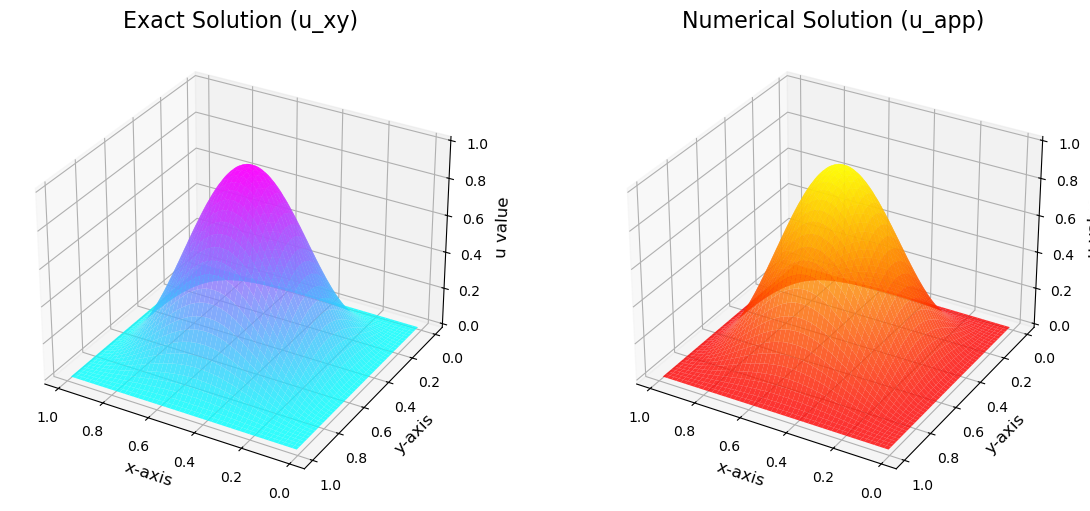

In [12]:
# test five points method
N = 100
N1 = N
N2 = N
boundary_condition = np.zeros((N1-1)*(N2-1))
sourse_term = np.zeros((N1-1)*(N2-1))
h1 = 1/N2
h2 = 1/N1
# for j in range(N2-1):
#     for i in range(N1-1):
#         sourse_term[i+j*(N1-1)] = soure_term((i+1)*h1,(j+1)*h2)
#print(sourse_term)
x = np.linspace(0,1,N1,endpoint = False)
y = np.linspace(0,1,N2,endpoint = False)
x = x[1:]
y = y[1:]
xx,yy = np.meshgrid(x,y,indexing='ij')
u_xy = exact_function(xx,yy)
sourse_term = soure_term(xx,yy)
sourse_term = sourse_term.flatten(order='F')
u_app = five_point(N1,N2,sourse_term,boundary_condition)
fig = plt.figure(figsize=(14, 6))  # Set figure size
# Subplot 1: Exact solution
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(xx,yy, u_xy, cmap='cool', alpha=0.8)
ax1.set_title('Exact Solution (u_xy)', fontsize=16)
ax1.set_xlabel('x-axis', fontsize=12)
ax1.set_ylabel('y-axis', fontsize=12)
ax1.set_zlabel('u value', fontsize=12)
ax1.view_init(elev=30, azim=120)

print(xx.shape)
print(yy.shape)
# Subplot 2: Numerical solution
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
#u_app = u_app.T
surf2 = ax2.plot_surface(xx, yy, u_app, cmap='autumn', alpha=0.8)
ax2.set_title('Numerical Solution (u_app)', fontsize=16)
ax2.set_xlabel('x-axis', fontsize=12)
ax2.set_ylabel('y-axis', fontsize=12)
ax2.set_zlabel('u value', fontsize=12)
ax2.view_init(elev=30, azim=120)

#plt.tight_layout()
plt.show()


In [13]:
def calculate_error_norm1_norminfinte(u_ext,u_num):# function that calculate the error between real and numerical solutions in 
    error1 = np.abs(u_ext - u_num)
    error2 = np.max(error1)
    return error1, error2

0.125
0.0625
0.03125
0.015625
0.0078125


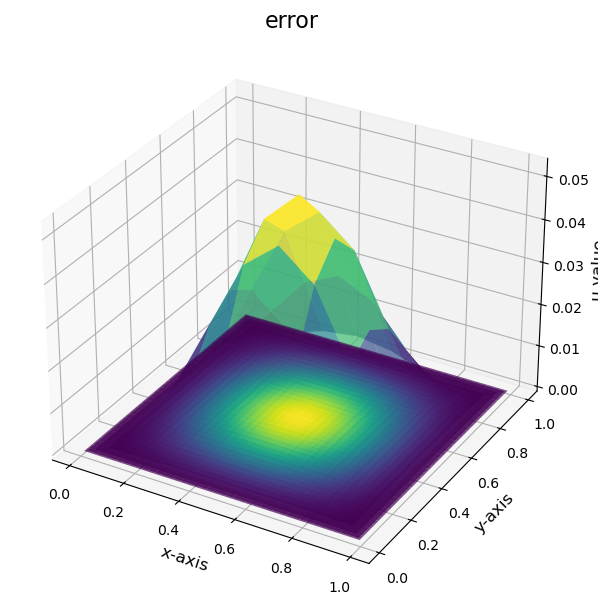

[0.24421875762074907, 0.2485543505103116, 0.2496385698963723, 0.24990964141428398]


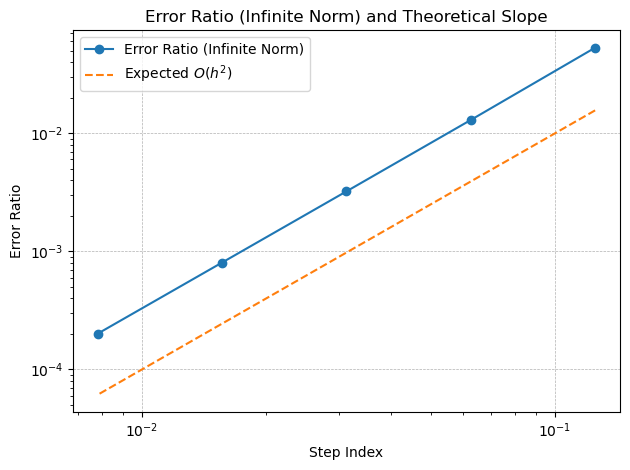

In [14]:
N_list = [8,16,32,64,128]
h_list = [1.0 / n for n in N_list]
error1_list = []
error2_list = []
error2_ratio = []

fig = plt.figure(figsize=(12, 6))
ax4 = fig.add_subplot(1, 2, 1, projection='3d')

for N in N_list:
    x = np.linspace(0,1,N,endpoint = False)
    y = np.linspace(0,1,N,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y,indexing='ij')
    boundary_condition = np.zeros((N-1)*(N-1))
    sourse_term = soure_term(xx,yy)
    sourse_term = sourse_term.flatten(order='F')
    u_ext = exact_function(yy,xx)
    u_num = five_point(N,N,sourse_term,boundary_condition)
    error1,error2 = calculate_error_norm1_norminfinte(u_ext,u_num)
    #print(error1)
    error1_list.append(error1)
    error2_list.append(error2)
    ax4.plot_surface(xx, yy, error1, cmap='viridis', edgecolor='none', alpha=0.7, label=f'N={N}')
ax4.set_title('error', fontsize=16)
ax4.set_xlabel('x-axis', fontsize=12)
ax4.set_ylabel('y-axis', fontsize=12)
ax4.set_zlabel('u value', fontsize=12)
plt.tight_layout()
plt.show()


# calculate E2/E1
for i in range(1, len(error2_list)):
    error2_ratio.append(error2_list[i] / error2_list[i-1])

print(error2_ratio)

# theoretical_slope
h_ratio = [h_list[i] / h_list[i-1] for i in range(1, len(h_list))]


# error
plt.figure()
plt.loglog(h_list , error2_list, 'o-', label="Error Ratio (Infinite Norm)")
plt.loglog(h_list, [h**2 for h in h_list], linestyle='--', label='Expected $O(h^2)$')
plt.xlabel("Step Index")
plt.ylabel("Error Ratio")
plt.title("Error Ratio (Infinite Norm) and Theoretical Slope")
plt.grid(True,  linestyle="--", linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()
    

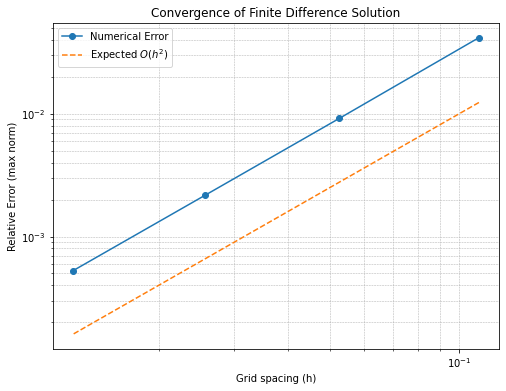

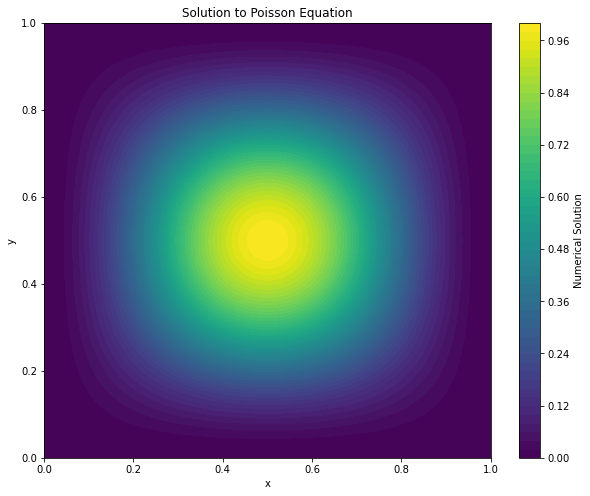

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 19 18:07:12 2025

@author: tommasomelotti
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve

def exact_solution(x, y):
    return np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2

def rhs_function(x, y):
    return 2 * np.pi**2 * (
        np.cos(2 * np.pi * x) * np.sin(np.pi * y)**2 +
        np.cos(2 * np.pi * y) * np.sin(np.pi * x)**2
    )

def solve_poisson_sparse(N):
    # Grid setup
    h = 1.0 / (N - 1)  # Step size
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)

    # Exact solution and RHS
    u_exact = exact_solution(X, Y)
    f = rhs_function(X, Y)

    # Interior points count
    num_interior = (N - 2)

    # Sparse Laplacian using Kronecker products
    e = np.ones(num_interior)
    T = diags([e, -2 * e, e], [-1, 0, 1], shape=(num_interior, num_interior))
    I = eye(num_interior)
    laplacian = (kron(I, T) + kron(T, I)) / h**2

    # Flatten the RHS, exclude boundary points
    f_flat = f[1:-1, 1:-1].flatten()

    # Solve the linear system
    u_flat = spsolve(laplacian, f_flat)

    # Reshape solution to 2D and add boundary conditions
    u = np.zeros((N, N))
    u[1:-1, 1:-1] = u_flat.reshape((num_interior, num_interior))

    return X, Y, u, u_exact

def compute_error(u, u_exact):
    return np.max(np.abs(u - u_exact)) / np.max(np.abs(u_exact))

def main():
    grid_sizes = [10, 20, 40, 80]
    errors = []
    hs = []

    for N in grid_sizes:
        X, Y, u, u_exact = solve_poisson_sparse(N)
        error = compute_error(u, u_exact)
        errors.append(error)
        hs.append(1.0 / (N - 1))

    # Convergence plot
    plt.figure(figsize=(8, 6))
    plt.loglog(hs, errors, marker='o', label='Numerical Error')
    plt.loglog(hs, [h**2 for h in hs], linestyle='--', label='Expected $O(h^2)$')
    plt.xlabel('Grid spacing (h)')
    plt.ylabel('Relative Error (max norm)')
    plt.title('Convergence of Finite Difference Solution')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

    # Plot solution for the largest grid size
    X, Y, u, u_exact = solve_poisson_sparse(grid_sizes[-1])
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, u, 50, cmap='viridis')
    plt.colorbar(label='Numerical Solution')
    plt.title('Solution to Poisson Equation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

if __name__ == "__main__":
    main()


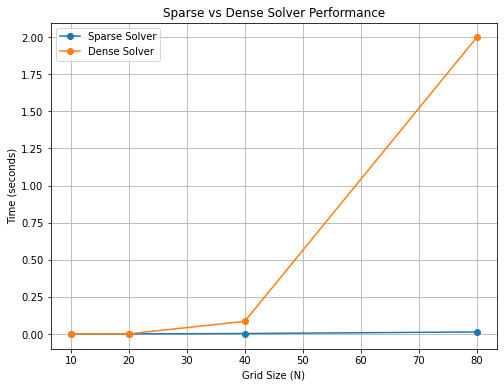

In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 24 14:34:01 2025

@author: tommasomelotti
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve
from time import time

# Exact solution and RHS definition
def exact_solution(x, y):
    return np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2

def rhs_function(x, y):
    return 2 * np.pi**2 * (
        np.cos(2 * np.pi * x) * np.sin(np.pi * y)**2 +
        np.cos(2 * np.pi * y) * np.sin(np.pi * x)**2
    )

def solve_poisson_sparse(N):
    """Solve the Poisson equation using a sparse matrix representation."""
    h = 1.0 / (N - 1)
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)

    u_exact = exact_solution(X, Y)
    f = rhs_function(X, Y)

    num_interior = N - 2
    e = np.ones(num_interior)
    T = diags([e, -2 * e, e], [-1, 0, 1], shape=(num_interior, num_interior))
    I = eye(num_interior)
    laplacian = (kron(I, T) + kron(T, I)) / h**2

    f_flat = f[1:-1, 1:-1].flatten()
    start_time = time()
    u_flat = spsolve(laplacian, f_flat)
    elapsed_time = time() - start_time

    u = np.zeros((N, N))
    u[1:-1, 1:-1] = u_flat.reshape((num_interior, num_interior))

    return X, Y, u, u_exact, elapsed_time

def solve_poisson_dense(N):
    """Solve the Poisson equation using a dense matrix representation."""
    h = 1.0 / (N - 1)
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)

    u_exact = exact_solution(X, Y)
    f = rhs_function(X, Y)

    num_interior = N - 2
    e = np.ones(num_interior)
    T = np.diag(e[:-1], -1) + np.diag(-2 * e) + np.diag(e[:-1], 1)
    I = np.eye(num_interior)
    laplacian = (np.kron(I, T) + np.kron(T, I)) / h**2

    f_flat = f[1:-1, 1:-1].flatten()
    start_time = time()
    u_flat = np.linalg.solve(laplacian, f_flat)
    elapsed_time = time() - start_time

    u = np.zeros((N, N))
    u[1:-1, 1:-1] = u_flat.reshape((num_interior, num_interior))

    return X, Y, u, u_exact, elapsed_time

def compute_error(u, u_exact):
    return np.max(np.abs(u - u_exact)) / np.max(np.abs(u_exact))

def main():
    grid_sizes = [10, 20, 40, 80]
    sparse_times = []
    dense_times = []
    errors = []

    for N in grid_sizes:
        # Sparse solution
        _, _, u_sparse, u_exact, sparse_time = solve_poisson_sparse(N)
        sparse_times.append(sparse_time)

        # Dense solution
        _, _, u_dense, _, dense_time = solve_poisson_dense(N)
        dense_times.append(dense_time)

        # Compute error
        error = compute_error(u_sparse, u_exact)
        errors.append(error)



    # Plot computational times
    plt.figure(figsize=(8, 6))
    plt.plot(grid_sizes, sparse_times, marker='o', label='Sparse Solver')
    plt.plot(grid_sizes, dense_times, marker='o', label='Dense Solver')
    plt.xlabel('Grid Size (N)')
    plt.ylabel('Time (seconds)')
    plt.title('Sparse vs Dense Solver Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


Relative error: 5.30e-02
Iterations: 343, Final Residual Norm: 9.51e-11


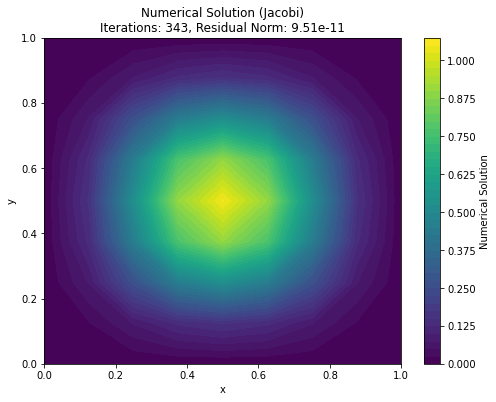

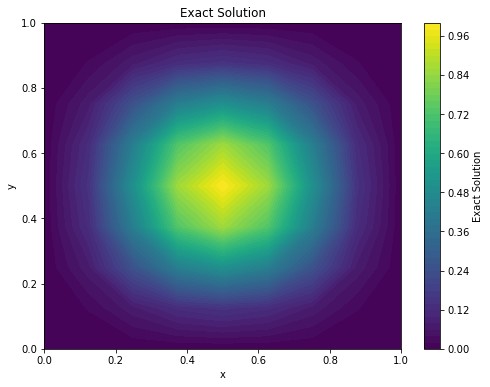

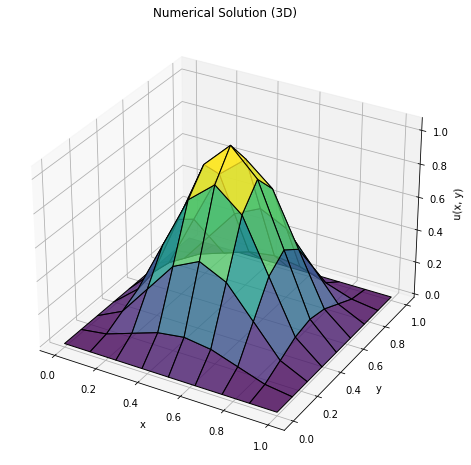

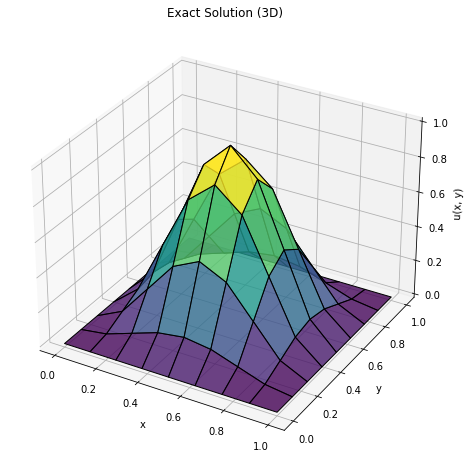

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve
from numpy.linalg import norm, eigvals

def exact_solution(x, y):
    return np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2

def rhs_function(x, y):
    return 2 * np.pi**2 * (
        np.cos(2 * np.pi * x) * np.sin(np.pi * y)**2 +
        np.cos(2 * np.pi * y) * np.sin(np.pi * x)**2
    )

def jacobi_method(A, b, tol=(1e-6, 1e-6), max_its=100, x0=None):
    n = len(A)
    
    # Default initial guess if not provided
    if x0 is None:
        x0 = np.zeros(n)
    
    # Tolerance
    tol_rel, tol_abs = tol
    
    # Norm of the right-hand side vector
    norm_b = np.linalg.norm(b)
    
    # Initial guess
    x = x0
    
    # Initial residual
    r = b - np.dot(A, x)
    norm_r = np.linalg.norm(r)
    
    its = 0
    
    # Diagonal matrix D
    D = np.diag(np.diag(A))
    
    # Solve the system to get the G matrix (G = I - D^-1 * A)
    G = np.eye(n) - np.linalg.solve(D, A)
    
    # Spectral radius (max eigenvalue)
    eigenvalues = np.linalg.eigvals(G)
    ro = np.sqrt(np.max(np.abs(eigenvalues)))
    
    # Check if the method can converge (spectral radius must be less than 1)
    if ro > 1:
        print('Warning: The method cannot converge, spectral radius > 1')
    
    # Iteration
    while norm_r > tol_rel * norm_b + tol_abs and its < max_its:
        its += 1
        x = np.dot(G, x) + np.linalg.solve(D, b)
        r = b - np.dot(A, x)
        norm_r = np.linalg.norm(r)
    
    # Check if the tolerance was not reached
    if norm_r > tol_rel * norm_b + tol_abs:
        print('Warning: Could not reach the desired tolerance')
    
    return x, its, norm_r, ro


def solve_poisson_with_jacobi(N, tol=1e-12, max_its=1000):
    # Grid setup
    xmax, xmin = 1, 0
    ymax, ymin = 1, 0
    h = (xmax - xmin) / (N - 1)
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)

    # Initialize boundary conditions (zero everywhere)
    U = np.zeros((N, N))

    # Exact solution and RHS
    u_exact = exact_solution(X, Y)
    f = rhs_function(X, Y)

    # Interior points
    num_interior = N - 2

    e = np.ones(num_interior)
    T = diags([e, -2 * e, e], [-1, 0, 1], shape=(num_interior, num_interior))
    I = eye(num_interior)
    laplacian = (kron(I, T) + kron(T, I)) / h**2

    # Flatten the RHS and exclude boundary points
    f_flat = f[1:-1, 1:-1].flatten()

    # Solve using Jacobi method
    u_flat, its, norm_r, ro = jacobi_method(laplacian.toarray(), f_flat, tol=(tol, tol), max_its=max_its)

    # Reshape the solution to 2D and include boundary points
    u = np.zeros((N, N))
    u[1:-1, 1:-1] = u_flat.reshape((num_interior, num_interior))

    return X, Y, u, u_exact, its, norm_r

def main():
    # Grid size
    N = 9

    # Solve Poisson equation with Jacobi method
    X, Y, u, u_exact, its, norm_r = solve_poisson_with_jacobi(N)

    # Compute error
    error = np.max(np.abs(u - u_exact)) / np.max(np.abs(u_exact))
    print(f"Relative error: {error:.2e}")
    print(f"Iterations: {its}, Final Residual Norm: {norm_r:.2e}")

    # Plot numerical solution
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u, 50, cmap='viridis')
    plt.colorbar(label='Numerical Solution')
    plt.title(f'Numerical Solution (Jacobi)\nIterations: {its}, Residual Norm: {norm_r:.2e}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Plot exact solution
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u_exact, 50, cmap='viridis')
    plt.colorbar(label='Exact Solution')
    plt.title('Exact Solution')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Compare in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.set_title('Numerical Solution (3D)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    plt.show()

    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.set_title('Exact Solution (3D)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    plt.show()

if __name__ == "__main__":
    main()


Spectral radius of the iteration matrix: 0.8535533905932745
Relative error: 5.30e-02
Iterations: 172, Final Residual Norm: 9.99e-11


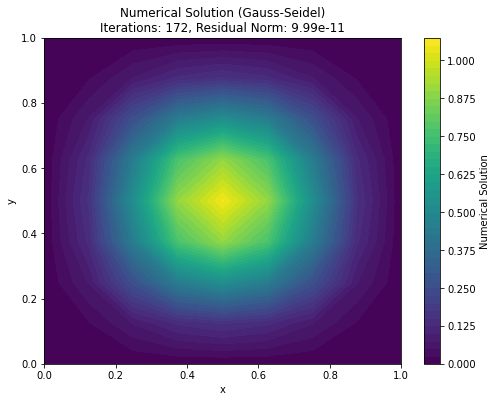

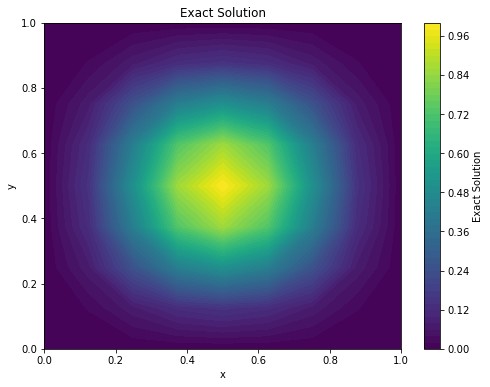

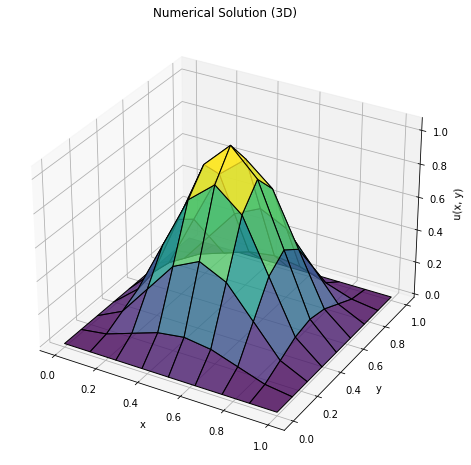

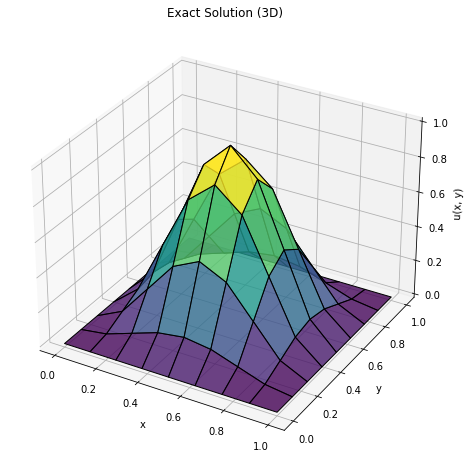

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 20 11:01:58 2025

@author: tommasomelotti
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from numpy.linalg import norm, eigvals

def exact_solution(x, y):
    return np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2

def rhs_function(x, y):
    return 2 * np.pi**2 * (
        np.cos(2 * np.pi * x) * np.sin(np.pi * y)**2 +
        np.cos(2 * np.pi * y) * np.sin(np.pi * x)**2
    )

def rhoGS(A):
    """
    Computes the spectral radius of the iteration matrix for the Gauss-Seidel method.
    """
    P = np.tril(A)  # Lower triangular part of A
    N = -np.triu(A, 1)  # Upper triangular part of A (excluding diagonal)
    M = np.linalg.inv(P) @ N
    spectral_radius = max(abs(eigvals(M)))
    return spectral_radius

def gauss_seidel(A, b, tol=None, max_its=100, x0=None):

    n = len(A)
    if tol is None:
        tol = [1e-8, 1e-8]
    elif np.isscalar(tol):
        tol = [tol, tol * tol]
    if x0 is None:
        x0 = np.zeros(n)
    
    norm_b = norm(b)
    x = x0.copy()
    r = b - A @ x
    norm_r = norm(r)
    its = 0
    P = np.tril(A)
    N = -np.triu(A, 1)

    # Compute spectral radius of the Gauss-Seidel iteration matrix
    spectral_radius = rhoGS(A)
    print(f"Spectral radius of the iteration matrix: {spectral_radius}")

    while (norm_r > tol[0] * norm_b + tol[1]) and (its < max_its):
        x = np.linalg.solve(P, N @ x + b)  # Gauss-Seidel update
        its += 1
        r = b - A @ x  # Compute residual
        norm_r = norm(r)

    if norm_r > tol[0] * norm_b + tol[1]:
        print("Warning: Unable to achieve the requested tolerance.")

    return x, its, norm_r

def solve_poisson_with_gauss_seidel(N, tol=1e-12, max_its=1000):
    # Grid setup
    xmax, xmin = 1, 0
    ymax, ymin = 1, 0
    h = (xmax - xmin) / (N - 1)
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)

    # Initialize boundary conditions (zero everywhere)
    U = np.zeros((N, N))

    # Exact solution and RHS
    u_exact = exact_solution(X, Y)
    f = rhs_function(X, Y)

    # Interior points
    num_interior = N - 2

    e = np.ones(num_interior)
    T = diags([e, -2 * e, e], [-1, 0, 1], shape=(num_interior, num_interior))
    I = eye(num_interior)
    laplacian = (kron(I, T) + kron(T, I)) / h**2

    # Flatten the RHS and exclude boundary points
    f_flat = f[1:-1, 1:-1].flatten()

    # Solve using Gauss-Seidel method
    u_flat, its, norm_r = gauss_seidel(laplacian.toarray(), f_flat, tol=(tol, tol), max_its=max_its)

    # Reshape the solution to 2D and include boundary points
    u = np.zeros((N, N))
    u[1:-1, 1:-1] = u_flat.reshape((num_interior, num_interior))

    return X, Y, u, u_exact, its, norm_r

def main():
    # Grid size
    N = 9

    # Solve Poisson equation with Gauss-Seidel method
    X, Y, u, u_exact, its, norm_r = solve_poisson_with_gauss_seidel(N)

    # Compute error
    error = np.max(np.abs(u - u_exact)) / np.max(np.abs(u_exact))
    print(f"Relative error: {error:.2e}")
    print(f"Iterations: {its}, Final Residual Norm: {norm_r:.2e}")

    # Plot numerical solution
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u, 50, cmap='viridis')
    plt.colorbar(label='Numerical Solution')
    plt.title(f'Numerical Solution (Gauss-Seidel)\nIterations: {its}, Residual Norm: {norm_r:.2e}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Plot exact solution
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u_exact, 50, cmap='viridis')
    plt.colorbar(label='Exact Solution')
    plt.title('Exact Solution')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Compare in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.set_title('Numerical Solution (3D)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    plt.show()

    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.set_title('Exact Solution (3D)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    plt.show()

if __name__ == "__main__":
    main()


Spectral radius of the iteration matrix: 0.9238795325112861
Relative error: 5.30e-02
Iterations: 54, Final Residual Norm: 5.12e-11


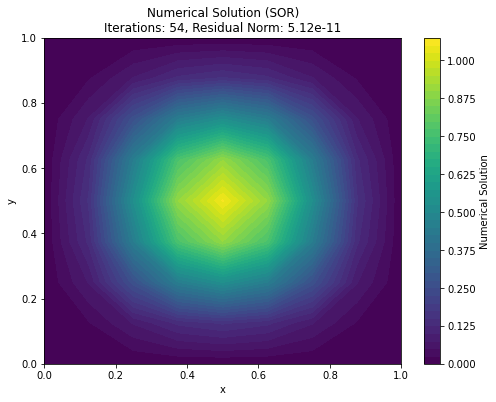

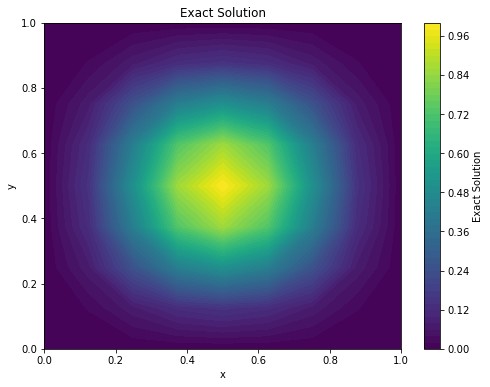

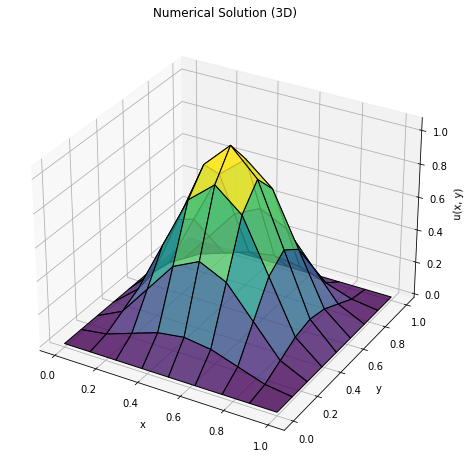

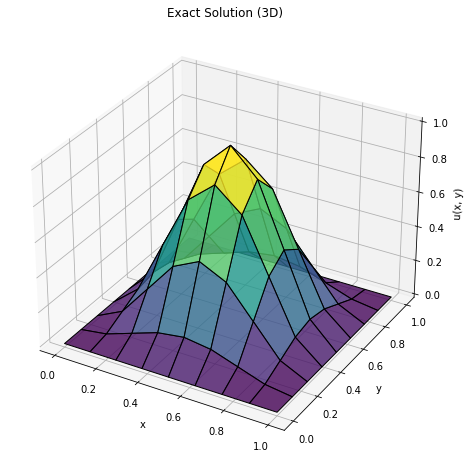

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from numpy.linalg import norm, eigvals

def exact_solution(x, y):
    return np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2

def rhs_function(x, y):
    return 2 * np.pi**2 * (
        np.cos(2 * np.pi * x) * np.sin(np.pi * y)**2 +
        np.cos(2 * np.pi * y) * np.sin(np.pi * x)**2
    )

def rhoSOR(A, omega):
    """
    Computes the spectral radius of the iteration matrix for the SOR method.
    """
    D = np.diag(np.diag(A))  # Diagonal part of A
    L = np.tril(A, -1)  # Lower triangular part of A
    U = np.triu(A, 1)  # Upper triangular part of A
    M = np.linalg.inv(D) @ (L + U)  # Iteration matrix for SOR
    spectral_radius = max(abs(eigvals(M)))
    return spectral_radius

def sor_method(A, b, omega=1.0, tol=None, max_its=100, x0=None):
    n = len(A)
    if tol is None:
        tol = [1e-8, 1e-8]
    elif np.isscalar(tol):
        tol = [tol, tol * tol]
    if x0 is None:
        x0 = np.zeros(n)
    
    norm_b = norm(b)
    x = x0.copy()
    r = b - A @ x
    norm_r = norm(r)
    its = 0
    
    # Compute spectral radius of the SOR iteration matrix
    spectral_radius = rhoSOR(A, omega)
    print(f"Spectral radius of the iteration matrix: {spectral_radius}")

    while (norm_r > tol[0] * norm_b + tol[1]) and (its < max_its):
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sigma) / A[i, i]
        r = b - A @ x  # Compute residual
        norm_r = norm(r)
        its += 1

    if norm_r > tol[0] * norm_b + tol[1]:
        print("Warning: Unable to achieve the requested tolerance.")

    return x, its, norm_r

def solve_poisson_with_sor(N, omega=1.5, tol=1e-12, max_its=1000):
    # Grid setup
    xmax, xmin = 1, 0
    ymax, ymin = 1, 0
    h = (xmax - xmin) / (N - 1)
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)

    # Initialize boundary conditions (zero everywhere)
    U = np.zeros((N, N))

    # Exact solution and RHS
    u_exact = exact_solution(X, Y)
    f = rhs_function(X, Y)

    # Interior points
    num_interior = N - 2

    e = np.ones(num_interior)
    T = diags([e, -2 * e, e], [-1, 0, 1], shape=(num_interior, num_interior))
    I = eye(num_interior)
    laplacian = (kron(I, T) + kron(T, I)) / h**2

    # Flatten the RHS and exclude boundary points
    f_flat = f[1:-1, 1:-1].flatten()

    # Solve using SOR method
    u_flat, its, norm_r = sor_method(laplacian.toarray(), f_flat, omega=omega, tol=(tol, tol), max_its=max_its)

    # Reshape the solution to 2D and include boundary points
    u = np.zeros((N, N))
    u[1:-1, 1:-1] = u_flat.reshape((num_interior, num_interior))

    return X, Y, u, u_exact, its, norm_r

def main():
    # Grid size
    N = 9
    omega = 1.58  # Relaxation parameter

    # Solve Poisson equation with SOR method
    X, Y, u, u_exact, its, norm_r = solve_poisson_with_sor(N, omega)

    # Compute error
    error = np.max(np.abs(u - u_exact)) / np.max(np.abs(u_exact))
    print(f"Relative error: {error:.2e}")
    print(f"Iterations: {its}, Final Residual Norm: {norm_r:.2e}")

    # Plot numerical solution
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u, 50, cmap='viridis')
    plt.colorbar(label='Numerical Solution')
    plt.title(f'Numerical Solution (SOR)\nIterations: {its}, Residual Norm: {norm_r:.2e}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Plot exact solution
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u_exact, 50, cmap='viridis')
    plt.colorbar(label='Exact Solution')
    plt.title('Exact Solution')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Compare in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.set_title('Numerical Solution (3D)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    plt.show()

    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.set_title('Exact Solution (3D)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    plt.show()

if __name__ == "__main__":
    main()


Solving for omega = 0.00
Spectral radius of the iteration matrix: 0.9238795325112861
Number of iterations for omega = 0.00: 1000
Solving for omega = 0.11
Spectral radius of the iteration matrix: 0.9238795325112861
Number of iterations for omega = 0.11: 1000
Solving for omega = 0.21
Spectral radius of the iteration matrix: 0.9238795325112861
Number of iterations for omega = 0.21: 1000
Solving for omega = 0.32
Spectral radius of the iteration matrix: 0.9238795325112861
Number of iterations for omega = 0.32: 948
Solving for omega = 0.42
Spectral radius of the iteration matrix: 0.9238795325112861
Number of iterations for omega = 0.42: 666
Solving for omega = 0.53
Spectral radius of the iteration matrix: 0.9238795325112861
Number of iterations for omega = 0.53: 497
Solving for omega = 0.63
Spectral radius of the iteration matrix: 0.9238795325112861
Number of iterations for omega = 0.63: 383
Solving for omega = 0.74
Spectral radius of the iteration matrix: 0.9238795325112861
Number of iterat

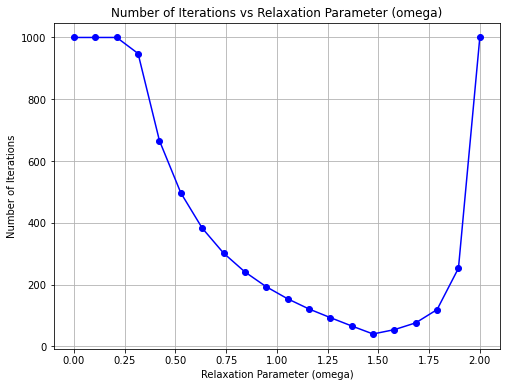

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 20 14:05:50 2025

@author: tommasomelotti
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from numpy.linalg import norm, eigvals

def exact_solution(x, y):
    return np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2

def rhs_function(x, y):
    return 2 * np.pi**2 * (
        np.cos(2 * np.pi * x) * np.sin(np.pi * y)**2 +
        np.cos(2 * np.pi * y) * np.sin(np.pi * x)**2
    )

def rhoSOR(A, omega):
    """
    Computes the spectral radius of the iteration matrix for the SOR method.
    """
    D = np.diag(np.diag(A))  # Diagonal part of A
    L = np.tril(A, -1)  # Lower triangular part of A
    U = np.triu(A, 1)  # Upper triangular part of A
    M = np.linalg.inv(D) @ (L + U)  # Iteration matrix for SOR
    spectral_radius = max(abs(eigvals(M)))
    return spectral_radius

def sor_method(A, b, omega=1.0, tol=None, max_its=100, x0=None):
    n = len(A)
    if tol is None:
        tol = [1e-8, 1e-8]
    elif np.isscalar(tol):
        tol = [tol, tol * tol]
    if x0 is None:
        x0 = np.zeros(n)
    
    norm_b = norm(b)
    x = x0.copy()
    r = b - A @ x
    norm_r = norm(r)
    its = 0
    
    # Compute spectral radius of the SOR iteration matrix
    spectral_radius = rhoSOR(A, omega)
    print(f"Spectral radius of the iteration matrix: {spectral_radius}")

    while (norm_r > tol[0] * norm_b + tol[1]) and (its < max_its):
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sigma) / A[i, i]
        r = b - A @ x  # Compute residual
        norm_r = norm(r)
        its += 1

    if norm_r > tol[0] * norm_b + tol[1]:
        print("Warning: Unable to achieve the requested tolerance.")

    return x, its, norm_r

def solve_poisson_with_sor(N, omega=1.5, tol=1e-12, max_its=1000):
    # Grid setup
    xmax, xmin = 1, 0
    ymax, ymin = 1, 0
    h = (xmax - xmin) / (N - 1)
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)

    # Initialize boundary conditions (zero everywhere)
    U = np.zeros((N, N))

    # Exact solution and RHS
    u_exact = exact_solution(X, Y)
    f = rhs_function(X, Y)

    # Interior points
    num_interior = N - 2

    e = np.ones(num_interior)
    T = diags([e, -2 * e, e], [-1, 0, 1], shape=(num_interior, num_interior))
    I = eye(num_interior)
    laplacian = (kron(I, T) + kron(T, I)) / h**2

    # Flatten the RHS and exclude boundary points
    f_flat = f[1:-1, 1:-1].flatten()

    # Solve using SOR method
    u_flat, its, norm_r = sor_method(laplacian.toarray(), f_flat, omega=omega, tol=(tol, tol), max_its=max_its)

    # Reshape the solution to 2D and include boundary points
    u = np.zeros((N, N))
    u[1:-1, 1:-1] = u_flat.reshape((num_interior, num_interior))

    return X, Y, u, u_exact, its, norm_r

def main():
    # Grid size
    N = 9
    tol = 1e-12  # Residual tolerance
    max_its = 1000  # Maximum number of iterations
    omega_values = np.linspace(0.0, 2.0, 20)  # Relaxation parameter values (0.0 to 2.0)
    iteration_counts = []  # List to store number of iterations

    # Loop over different omega values
    for omega in omega_values:
        print(f"Solving for omega = {omega:.2f}")
        _, _, _, _, its, _ = solve_poisson_with_sor(N, omega=omega, tol=tol, max_its=max_its)
        iteration_counts.append(its)
        print(f"Number of iterations for omega = {omega:.2f}: {its}")

    # Plot the number of iterations as a function of omega
    plt.figure(figsize=(8, 6))
    plt.plot(omega_values, iteration_counts, marker='o', linestyle='-', color='b')
    plt.xlabel('Relaxation Parameter (omega)')
    plt.ylabel('Number of Iterations')
    plt.title('Number of Iterations vs Relaxation Parameter (omega)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


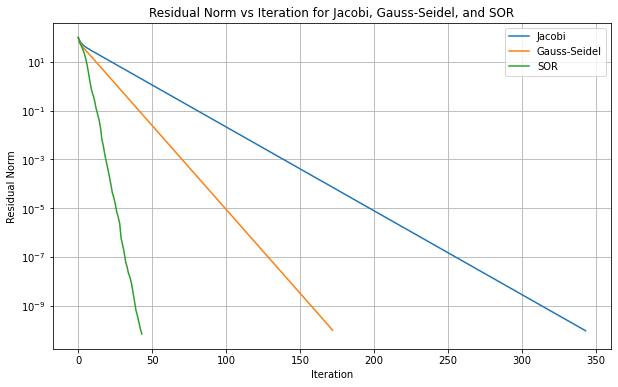

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from numpy.linalg import norm, eigvals

def exact_solution(x, y):
    return np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2

def rhs_function(x, y):
    return 2 * np.pi**2 * (
        np.cos(2 * np.pi * x) * np.sin(np.pi * y)**2 +
        np.cos(2 * np.pi * y) * np.sin(np.pi * x)**2
    )

def jacobi_method(A, b, tol=(1e-6, 1e-6), max_its=100, x0=None):
    n = len(A)
    if x0 is None:
        x0 = np.zeros(n)
    
    tol_rel, tol_abs = tol
    norm_b = np.linalg.norm(b)
    x = x0
    r = b - np.dot(A, x)
    norm_r = np.linalg.norm(r)
    its = 0
    
    # Track residuals
    residuals = [norm_r]

    D = np.diag(np.diag(A))
    G = np.eye(n) - np.linalg.solve(D, A)

    while norm_r > tol_rel * norm_b + tol_abs and its < max_its:
        its += 1
        x = np.dot(G, x) + np.linalg.solve(D, b)
        r = b - np.dot(A, x)
        norm_r = np.linalg.norm(r)
        residuals.append(norm_r)
    
    return x, residuals

def gauss_seidel_method(A, b, tol=(1e-6, 1e-6), max_its=100, x0=None):
    n = len(A)
    if x0 is None:
        x0 = np.zeros(n)

    tol_rel, tol_abs = tol
    norm_b = np.linalg.norm(b)
    x = x0
    r = b - np.dot(A, x)
    norm_r = np.linalg.norm(r)
    its = 0

    # Track residuals
    residuals = [norm_r]

    P = np.tril(A)
    N = -np.triu(A, 1)

    while norm_r > tol_rel * norm_b + tol_abs and its < max_its:
        its +=1
        x = np.linalg.solve(P, N @ x + b)
        r = b - np.dot(A, x)
        norm_r = np.linalg.norm(r)
        residuals.append(norm_r)
    
    return x, residuals

def sor_method(A, b, omega=1.5, tol=(1e-6, 1e-6), max_its=100, x0=None):
    n = len(A)
    if x0 is None:
        x0 = np.zeros(n)

    tol_rel, tol_abs = tol
    norm_b = np.linalg.norm(b)
    x = x0
    r = b - np.dot(A, x)
    norm_r = np.linalg.norm(r)
    its = 0

    # Track residuals
    residuals = [norm_r]

    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)

    while norm_r > tol_rel * norm_b + tol_abs and its < max_its:
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sigma) / A[i, i]
        r = b - np.dot(A, x)
        norm_r = np.linalg.norm(r)
        residuals.append(norm_r)
        its+=1
    
    return x, residuals

def solve_poisson(N, method="jacobi", omega=1.5, tol=1e-12, max_its=1000):
    xmax, xmin = 1, 0
    ymax, ymin = 1, 0
    h = (xmax - xmin) / (N - 1)
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)

    u_exact = exact_solution(X, Y)
    f = rhs_function(X, Y)

    num_interior = N - 2
    e = np.ones(num_interior)
    T = diags([e, -2 * e, e], [-1, 0, 1], shape=(num_interior, num_interior))
    I = eye(num_interior)
    laplacian = (kron(I, T) + kron(T, I)) / h**2

    f_flat = f[1:-1, 1:-1].flatten()

    if method == "jacobi":
        u_flat, residuals = jacobi_method(laplacian.toarray(), f_flat, tol=(tol, tol), max_its=max_its)
    elif method == "gauss_seidel":
        u_flat, residuals = gauss_seidel_method(laplacian.toarray(), f_flat, tol=(tol, tol), max_its=max_its)
    elif method == "sor":
        u_flat, residuals = sor_method(laplacian.toarray(), f_flat, omega=omega, tol=(tol, tol), max_its=max_its)

    u = np.zeros((N, N))
    u[1:-1, 1:-1] = u_flat.reshape((num_interior, num_interior))

    return X, Y, u, u_exact, residuals

def plot_residuals(residuals_jacobi, residuals_gs, residuals_sor):
    plt.figure(figsize=(10, 6))
    plt.semilogy(residuals_jacobi, label="Jacobi")
    plt.semilogy(residuals_gs, label="Gauss-Seidel")
    plt.semilogy(residuals_sor, label="SOR")
    plt.xlabel('Iteration')
    plt.ylabel('Residual Norm')
    plt.legend()
    plt.title('Residual Norm vs Iteration for Jacobi, Gauss-Seidel, and SOR')
    plt.grid(True)
    plt.show()

def main():
    N = 9  # Grid size
    omega = 1.5  # Relaxation parameter for SOR

    # Solve Poisson equation with each method 
    _, _, _, _, residuals_jacobi = solve_poisson(N, method="jacobi")
    _, _, _, _, residuals_gs = solve_poisson(N, method="gauss_seidel")
    _, _, _, _, residuals_sor = solve_poisson(N, method="sor", omega=omega)

    # Plot residuals for comparison
    plot_residuals(residuals_jacobi, residuals_gs, residuals_sor)

if __name__ == "__main__":
    main()


In [15]:
# richardson_extrapolation method
def richardson_extrapolation(N1,N2):
    
    N11 = 2 * N1 
    N22 = 2 * N2 
    sourse_term1 = get_source_term(N1,N2)
    sourse_term2 = get_source_term(N11,N22)
    boundary_condition1 = np.zeros((N1-1)*(N2-1))
    boundary_condition2 = np.zeros((N11-1)*(N22-1))
    u_1 = five_point(N1,N2,sourse_term1,boundary_condition1)
    u_2 = five_point(N11,N22,sourse_term2,boundary_condition2)
    u_2 = u_2[1::2, 1::2]
    u = 4/3 * u_2 - 1/3 * u_1

    return u

0.125
0.0625
0.0625
0.03125
0.03125
0.015625
0.015625
0.0078125


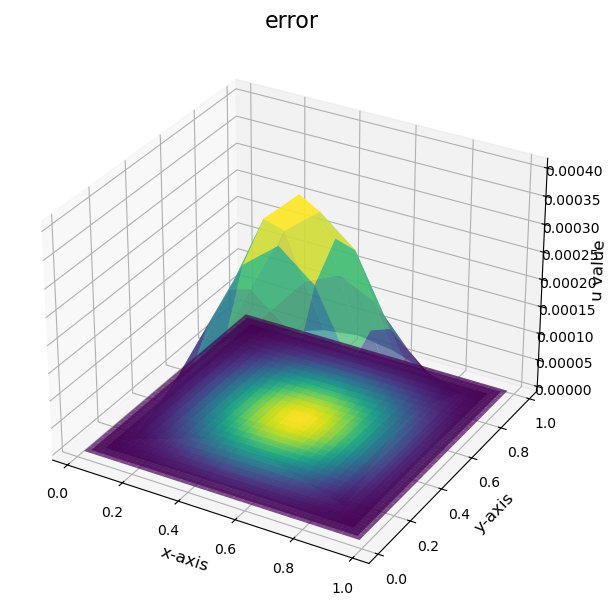

[0.061069005443539714, 0.062141636204859164, 0.0624103745000852]


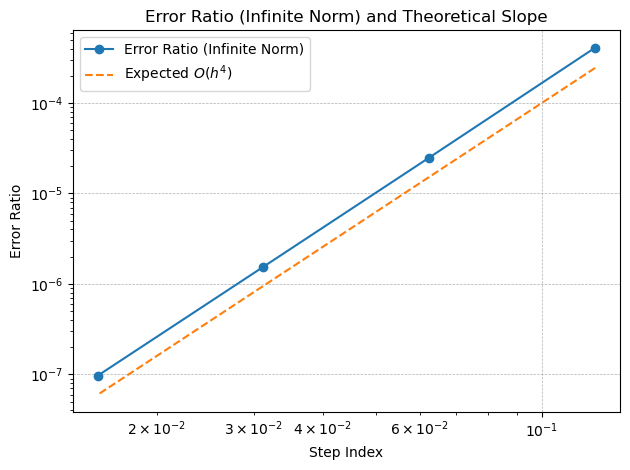

In [16]:
N_list = [8,16,32,64]
h_list = [1.0 / n for n in N_list]
error1_list_R = []
error2_list_R = []
error2_ratio_R = []

fig = plt.figure(figsize=(12, 6))
ax5 = fig.add_subplot(1, 2, 1, projection='3d')

for N in N_list:
    x = np.linspace(0,1,N,endpoint = False)
    y = np.linspace(0,1,N,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y,indexing='ij')
    u_ext = exact_function(yy,xx)
    u_num = richardson_extrapolation(N,N)
    error1,error2 = calculate_error_norm1_norminfinte(u_ext,u_num)
    #print(error1)
    error1_list_R.append(error1)
    error2_list_R.append(error2)
    ax5.plot_surface(xx, yy, error1, cmap='viridis', edgecolor='none', alpha=0.7, label=f'N={N}')
ax5.set_title('error', fontsize=16)
ax5.set_xlabel('x-axis', fontsize=12)
ax5.set_ylabel('y-axis', fontsize=12)
ax5.set_zlabel('u value', fontsize=12)
plt.tight_layout()
plt.show()


# calculate E2/E1
for i in range(1, len(error2_list_R)):
    error2_ratio_R.append(error2_list_R[i] / error2_list_R[i-1])

print(error2_ratio_R)

# error
plt.figure()
plt.loglog(h_list , error2_list_R, 'o-', label="Error Ratio (Infinite Norm)")
plt.loglog(h_list, [h**4 for h in h_list], linestyle='--', label='Expected $O(h^4)$')
plt.xlabel("Step Index")
plt.ylabel("Error Ratio")
plt.title("Error Ratio (Infinite Norm) and Theoretical Slope")
plt.grid(True,  linestyle="--", linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# compact finite differention method
def compact_finite(N1,N2,sourse_term,boundary_condition):
    # calculate stepsize
    h1 = 1/N1
    h2 = 1/N2
    print(h1)
    # calculate C ,D,then A
    C = np.zeros([N1-1,N1-1])
    cxx = 5/3 * (1/h1**2 + 1/h2**2)
    cxxm = -1/6 *(5 * 1/h1**2 - 1/h2**2)
    C = np.eye(N1-1)*cxx + np.eye(N1-1,k=-1)*cxxm + np.eye(N1-1,k=1)*cxxm
    N = (N1 - 1) * (N2 - 1)
    # I = np.eye(N2-1)
    # CC =  np.kron(I, C)
    #print(C)
    dxx = - 1/6 * (5 * 1/h2**2 - 1/h1**2)
    dxxm = -1/12 * (1/h1**2 + 1/h2**2)
    # I2 = np.eye(N2-1,k=1)
    # print(I2)
    # I22 = np.eye(N2-1,k=-1)
    D = np.eye(N1-1)*dxx + np.eye(N1-1,k=-1)*dxxm + np.eye(N1-1,k=1)*dxxm
    # DD =  np.kron(I2, D) + np.kron(I22, D)
    blocks = [[None for _ in range(N2-1)] for _ in range(N2-1)]
    for i in range(N2-1):
        for j in range(N2-1):
            if i == j: 
               blocks[i][j] = C
            elif abs(i - j) == 1:  
               blocks[i][j] = D
            else:  
               blocks[i][j] = np.zeros_like(C)
    #print(DD)
    #A =-(CC + DD)
    A = -np.block(blocks)
    b = sourse_term + boundary_condition
    u_vector = np.linalg.solve(A, b)# here should be changed
    #print(u_vector)
    # reshape u
    u_metrix = u_vector.reshape(N1-1,N2-1,order='F')
    return u_metrix

0.125
0.0625
0.03125
0.015625


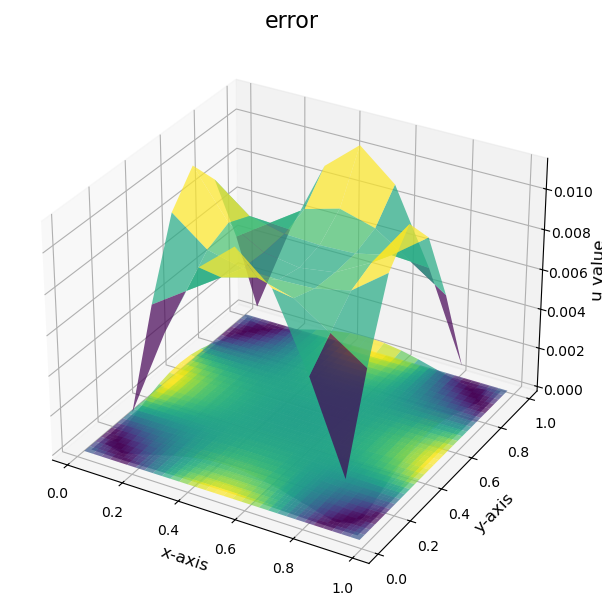

[0.09868381732721987, 0.07346062332978821, 0.06692701981252573]


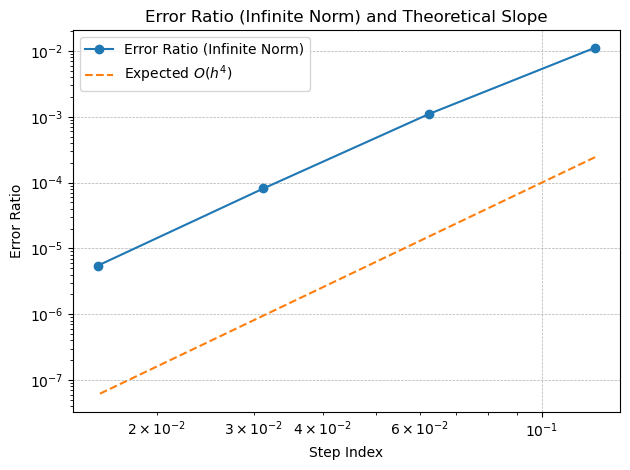

In [28]:
N_list = [8,16,32,64]
h_list = [1.0 / n for n in N_list]
error1_list_C = []
error2_list_C = []
error2_ratio_C = []

fig = plt.figure(figsize=(12, 6))
ax6 = fig.add_subplot(1, 2, 1, projection='3d')

for N in N_list:
    x = np.linspace(0,1,N,endpoint = False)
    y = np.linspace(0,1,N,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y,indexing='ij')
    boundary_condition = np.zeros((N-1)*(N-1))
    sourse_term = soure_term(xx,yy)
    sourse_term = apply_AB_to_source(sourse_term)
    sourse_term = sourse_term.flatten(order='F')
    u_ext = exact_function(xx,yy)
    u_num = compact_finite(N,N,sourse_term,boundary_condition)
    error1,error2 = calculate_error_norm1_norminfinte(u_ext,u_num)
    #print(error1)
    error1_list_C.append(error1)
    error2_list_C.append(error2)
    ax6.plot_surface(xx, yy, error1, cmap='viridis', edgecolor='none', alpha=0.7, label=f'N={N}')
ax6.set_title('error', fontsize=16)
ax6.set_xlabel('x-axis', fontsize=12)
ax6.set_ylabel('y-axis', fontsize=12)
ax6.set_zlabel('u value', fontsize=12)
plt.tight_layout()
plt.show()


# calculate E2/E1
for i in range(1, len(error2_list_C)):
    error2_ratio_C.append(error2_list_C[i] / error2_list_C[i-1])

print(error2_ratio_C)

# error
plt.figure()
plt.loglog(h_list , error2_list_C, 'o-', label="Error Ratio (Infinite Norm)")
plt.loglog(h_list, [h**4 for h in h_list], linestyle='--', label='Expected $O(h^4)$')
plt.xlabel("Step Index")
plt.ylabel("Error Ratio")
plt.title("Error Ratio (Infinite Norm) and Theoretical Slope")
plt.grid(True,  linestyle="--", linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

 iterations 73


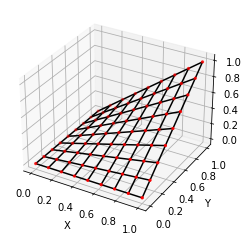

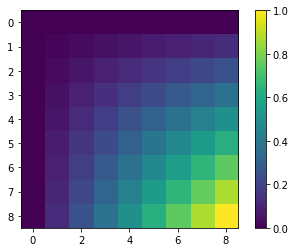

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 19 15:33:30 2025

@author: tommasomelotti
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xmax = 1
xmin = 0
ymax = 1
ymin = 0
Nx = 9 # number of grid points in x direction
Ny = 9  # number of grid points for y direction
h = (xmax-xmin)/(Nx+1)
k = (ymax-ymin)/(Nx+1)
tol = 1e-4
X,Y = np.meshgrid( np.linspace(xmin, xmax, Nx), np.linspace(ymin, ymax, Ny))

# initialization
U = np.zeros((Nx,Ny), float)
U_temp = np.zeros((Nx,Ny), float)
diff = np.zeros((Nx-1,Ny-1), float) # only interior points

# boundary conditions
U[0,:] = 0.0 # left
U[-1,:] = np.linspace(xmin, xmax, Nx) # right
U[:,0] = 0.0 # bottom
U[:,-1] = np.linspace(ymin, ymax, Ny) # top

# print(U)

U_temp = U 

# iteration
for it in range(1000):
    U = U_temp.copy()
    for j in range(1, Ny-1):
        for i in range(1, Nx-1):
            U_temp[i,j] = 0.25*(U[i+1,j]+U[i-1,j]+U[i,j+1]+U[i,j-1])
            
    diff = np.abs(U-U_temp)
    
    if np.max(diff)<tol: # if not it runs again
        print(f" iterations {it}")
        break 
    
X,Y = np.meshgrid( np.linspace(xmin, xmax, Nx), np.linspace(ymin, ymax, Ny))
u_ex = X*Y # exact solution
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y, U, color='k', label = 'numerical ')
ax.scatter3D(X,Y,u_ex, c='red', marker='.', label = 'analytical')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
fig = plt.figure(2)
plt.imshow(U)
clb=plt.colorbar()
plt.show()


    
    
